In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, f1_score, accuracy_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score



In [10]:
# Load Pima Indians Diabetes dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
df = pd.read_csv(url, header=None)




In [11]:
# Split dataset into training and testing sets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [12]:
# Train SVM classifier on training set and make predictions on testing set
model = SVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [13]:
# Evaluate performance of model using classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

[[87 12]
 [24 31]]


In [14]:
# Loop over different proportions of the positive class and train and evaluate SVM classifier on each subset
proportions = np.arange(0.1, 1.0, 0.1)
f1_scores = []
precision_scores = []
recall_scores = []
accuracy_scores = []
roc_auc_scores = []
matthews_corrcoef_scores = []
cohen_kappa_scores = []
for prop in proportions:
    # Subset the dataset to a certain proportion of the positive class (diabetes patients)
    subset_df = df[df.iloc[:, -1] == 1].append(df[df.iloc[:, -1] == 0].sample(frac=prop))
    X = subset_df.iloc[:, :-1]
    y = subset_df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = SVC(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    precision_scores.append(precision[1])
    recall_scores.append(recall[1])
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))
    matthews_corrcoef_scores.append(matthews_corrcoef(y_test, y_pred))
    cohen_kappa_scores.append(cohen_kappa_score(y_test, y_pred))


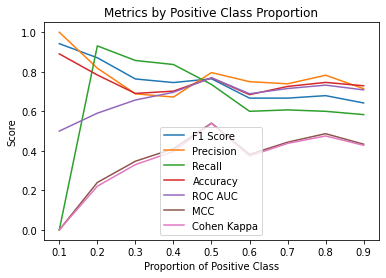

In [15]:

# Plot different classification metrics against proportion of positive class
plt.plot(proportions, f1_scores, label='F1 Score')
plt.plot(proportions, precision_scores, label='Precision')
plt.plot(proportions, recall_scores, label='Recall')
plt.plot(proportions, accuracy_scores, label='Accuracy')
plt.plot(proportions, roc_auc_scores, label='ROC AUC')
plt.plot(proportions, matthews_corrcoef_scores, label='MCC')
plt.plot(proportions, cohen_kappa_scores, label='Cohen Kappa')
plt.title('Metrics by Positive Class Proportion')
plt.xlabel('Proportion of Positive Class')
plt.ylabel('Score')
plt.legend()
plt.show()
